In [1]:
# import required libraries
import pandas as pd
import numpy as np
# import required libraries 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
# Import seeds dataset
seed_data = pd.read_table('seeds_dataset.txt', sep="\t",on_bad_lines='skip')

# set the column names
seed_data.columns = ["area", "parimeter", "compactness", "length_of_kernal", "width_of_kernal", "asymmetry", 
                "length_of_kernel_groove", "type"]

# compactness contains one nan value
seed_data['compactness'] = seed_data['compactness'].fillna(0)

# set the input variables
x = seed_data[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
y = seed_data['type']

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.5, random_state=5)

In [3]:
#build corralation matrix to check the corralation of each of the inputs
corr_matrix = seed_data.corr()

#print our correlation matrix
print(corr_matrix["type"].sort_values(ascending = False))

type                       1.000000
asymmetry                  0.571351
length_of_kernel_groove    0.033120
length_of_kernal          -0.248737
parimeter                 -0.322321
area                      -0.341249
width_of_kernal           -0.422823
compactness               -0.541270
Name: type, dtype: float64


In [4]:
# Scale and transform our features between -1 & 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

# create our svm model with Regularization, maximum-margin & maximun iteration
svm = LinearSVC(C=100, loss='hinge', max_iter=100000)

# fit the training data to the model
svm.fit(x_train, Y_train)

# print the score of our model
print("SVM Model Accuracy : ",svm.score(x_test,Y_test))

#set the y_pred to our model.predict 
y_pred = svm.predict(x_test)

# create a confusion matrix and pass i y_test and y_pred
cm = pd.DataFrame(confusion_matrix(Y_test, y_pred))


SVM Model Accuracy :  0.9696969696969697


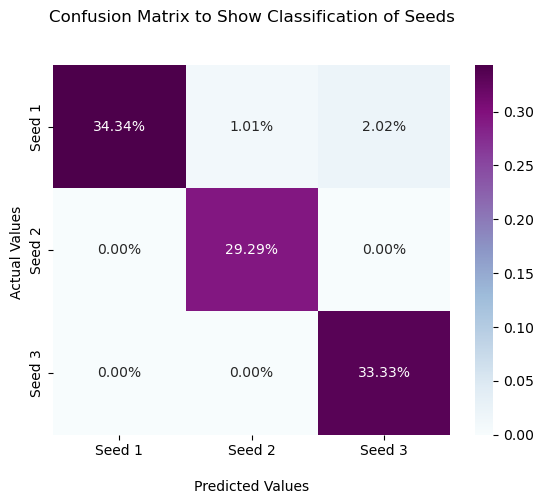

In [5]:
cf_matrix1 = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='BuPu')

ax.set_title('Confusion Matrix to Show Classification of Seeds\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])
ax.yaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])

## Display the visualization of the Confusion Matrix.
plt.show()

Text(0.5, 1.0, 'SVM Decision Region Boundary')

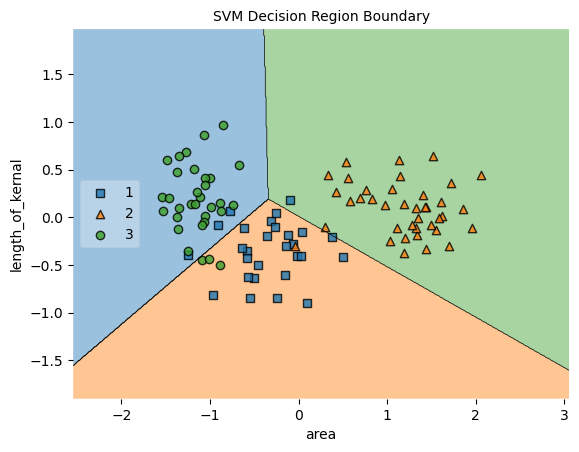

In [6]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(x_train)
svm.fit(X_train, Y_train)
plot_decision_regions(X_train, Y_train.values, clf=svm, legend=6)

plt.xlabel(x.columns[0], size=10)
plt.ylabel(x.columns[1], size=10)
plt.title('SVM Decision Region Boundary', size=10)

### Assignment 2

In [7]:
import pandas as pd
import random

def randomize_dataframe(df, percentage=0.3):
    """
    Randomizes a percentage of the cells in the given DataFrame.
    
    Args:
    df (pandas.DataFrame): The DataFrame to be randomized.
    percentage (float): The percentage of cells to randomize.
    
    Returns:
    pandas.DataFrame: The randomized DataFrame.
    """
    num_rows, num_cols = df.shape
    num_to_randomize = int(num_rows * num_cols * percentage)  # Calculate the number of cells to randomize
    cells_to_randomize = random.sample(list(df.stack().index), num_to_randomize)  # Select a random subset of cells to randomize
    for cell in cells_to_randomize:
        df.at[cell] = random.random()  # Randomize the cell value
    
    return df


In [8]:
x_randomized = randomize_dataframe(x)

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(x_randomized, y, test_size=.5, random_state=5)

In [9]:
# Scale and transform our features between -1 & 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

# create our svm model with Regularization, maximum-margin & maximun iteration
svm = LinearSVC(C=100, loss='hinge', max_iter=100000)

# fit the training data to the model
svm.fit(x_train, Y_train)

# print the score of our model
print("SVM Model Accuracy : ",svm.score(x_test,Y_test))

#set the y_pred to our model.predict 
y_pred = svm.predict(x_test)

# create a confusion matrix and pass i y_test and y_pred
cm = pd.DataFrame(confusion_matrix(Y_test, y_pred))


SVM Model Accuracy :  0.46464646464646464
